In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
data=pd.read_csv('Bengaluru_House_Data.csv')


In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape


(13320, 9)

In [6]:
#working with area-type
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
#droping the less relavant column
df1=data.drop(['area_type','society','balcony','availability'],axis=1)

In [8]:
df1.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
#dealing with null values
df1.isnull().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2=df1.dropna()

In [12]:
df2.shape

(13246, 5)

In [13]:
df2.isnull().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [14]:
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [15]:
#there are different unit in size column so we create new column

def room_size(x):
    s=x.split(' ')
    return int(s[0])

In [16]:
room_size('4 bhk')

4

In [17]:
df2['new_size']=df2['size'].apply(lambda x:room_size(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df2.head()
df2.shape

(13246, 6)

In [19]:
df2['new_size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
#explore column total sq foot
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [21]:
#extracting column total_sqft which is not in proper format
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,new_size
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
#convert this in proper format by taking the average of range values

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df4 = df2.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,new_size
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df4.shape

(13246, 6)

In [25]:
#for sum values we returned none value so now we have to remove them
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
new_size       0
dtype: int64

In [26]:
df5=df4.dropna()

In [27]:
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
new_size      0
dtype: int64

In [28]:
df5.head()

,location,size,total_sqft,bath,price,new_size
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [29]:
#now we look at a location column
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [30]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

location
Whitefield                              532
Sarjapur  Road                          392
Electronic City                         302
Kanakpura Road                          264
Thanisandra                             232
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1298, dtype: int64

In [31]:
#there are too many different category this is called Dimensionality Reduction problem 

In [32]:
location_stats.values.sum()

13200

In [33]:
len(location_stats[location_stats>10])

240

In [34]:
#so many values less than 10 so we put it in other category
len(location_stats[location_stats<=10])


1058

In [35]:
df6=df5.copy()

In [36]:
location_stats_less=location_stats[location_stats<=10]

In [37]:
df6['location']=df6['location'].apply(lambda x: 'others' if x in location_stats_less else x )

In [38]:
len(df6.location.unique())

241

In [39]:
df6.head(10)

,location,size,total_sqft,bath,price,new_size
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,others,6 Bedroom,1020.0,6.0,370.00,6


In [40]:
#Adding new column
df6['price_per_sq']=df6['price']*100000/df6['total_sqft']


In [41]:
df6.head()

,location,size,total_sqft,bath,price,new_size,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [42]:
#now we remove outliers from our dataset

In [43]:
df6[(df6.total_sqft/df6.new_size)<300].head()

,location,size,total_sqft,bath,price,new_size,price_per_sq
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,others,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [44]:
#these are the outliers look at the number of rooms and squarefeet

In [45]:
df6.shape

(13200, 7)

In [46]:
df7=df6[~((df6.total_sqft/df6.new_size)<300)]

In [47]:
df7.shape

(12456, 7)

In [48]:
#outlier remover through mean and sd

In [49]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df7)
df7.shape

(10245, 7)

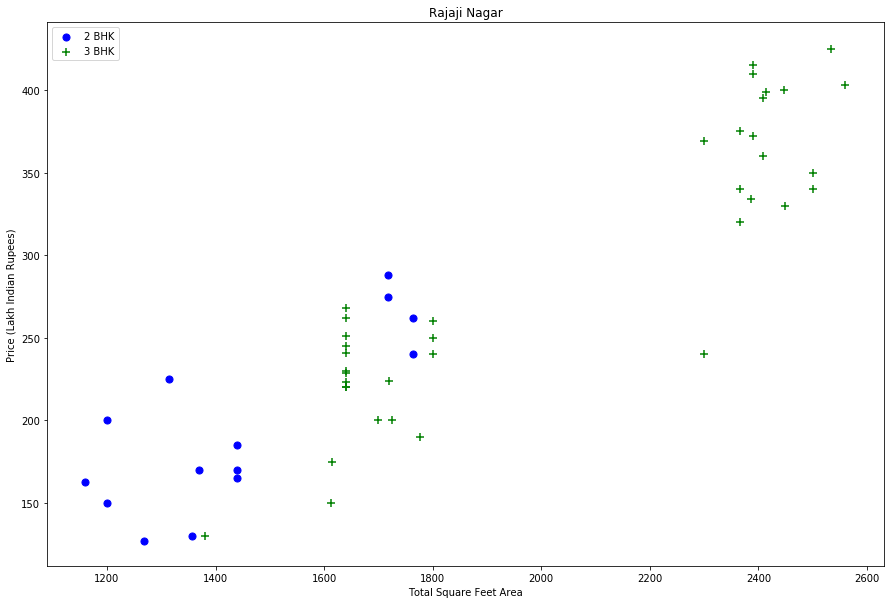

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.new_size==2)]
    bhk3 = df[(df.location==location) & (df.new_size==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")


In [51]:
def remove_outlier(df):
    exclude_indices=np.array([])
    for locaton,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('new_size'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sq),
                'sd':np.std(bhk_df.price_per_sq),
                'count':bhk_df.shape[0]
            } 
        for bhk,bhk_df in location_df.groupby('new_size'):   
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_outlier(df7)
df8.shape



(7331, 7)

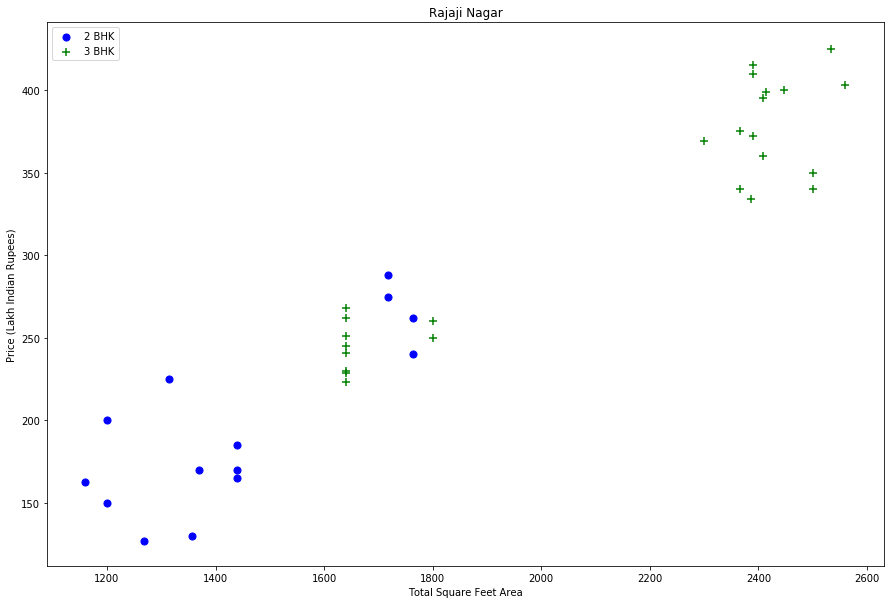

In [52]:
plot_scatter_chart(df8,"Rajaji Nagar")


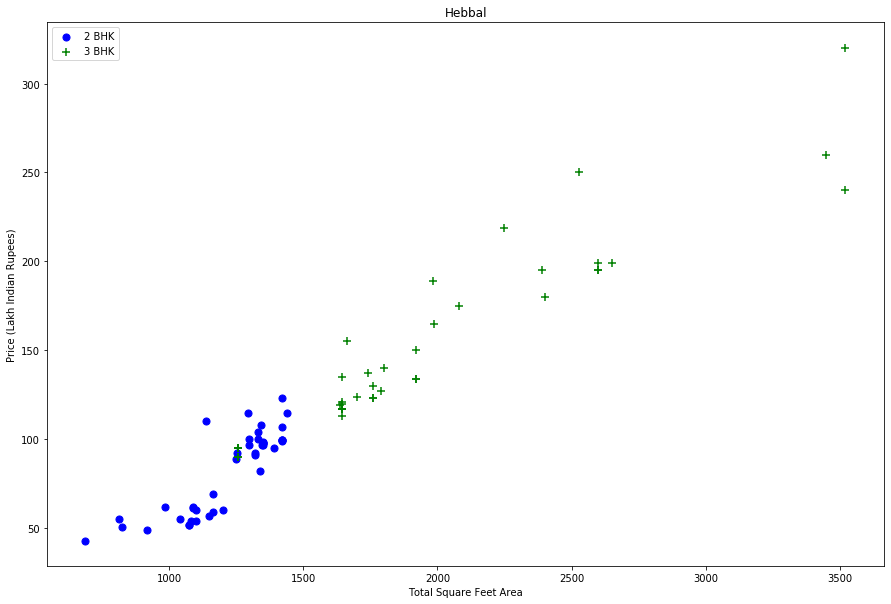

In [53]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

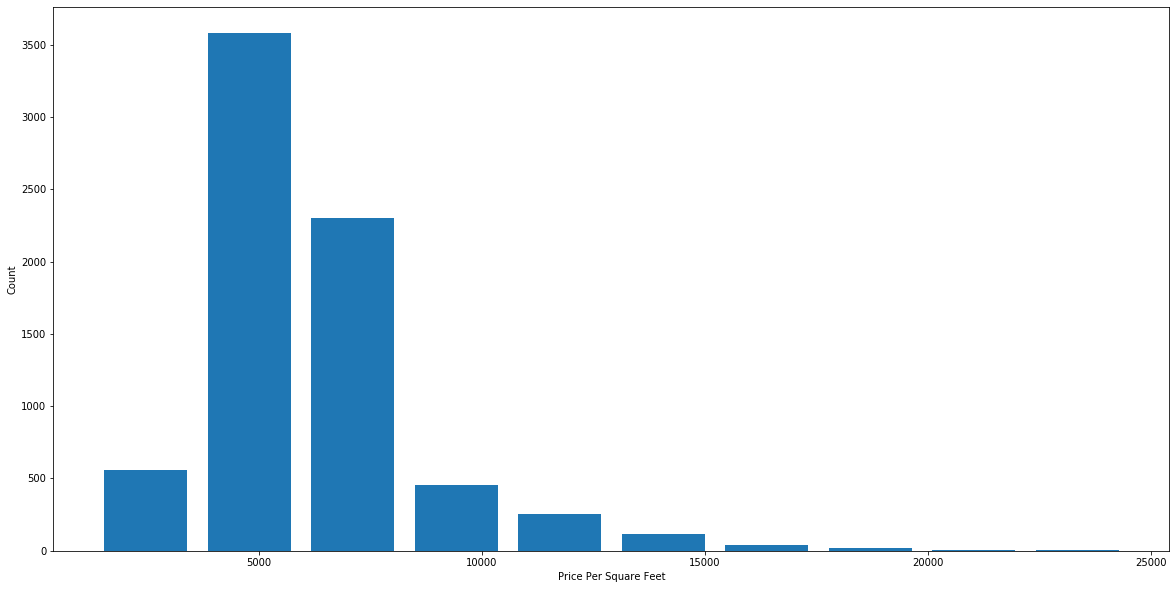

In [54]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sq,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [55]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

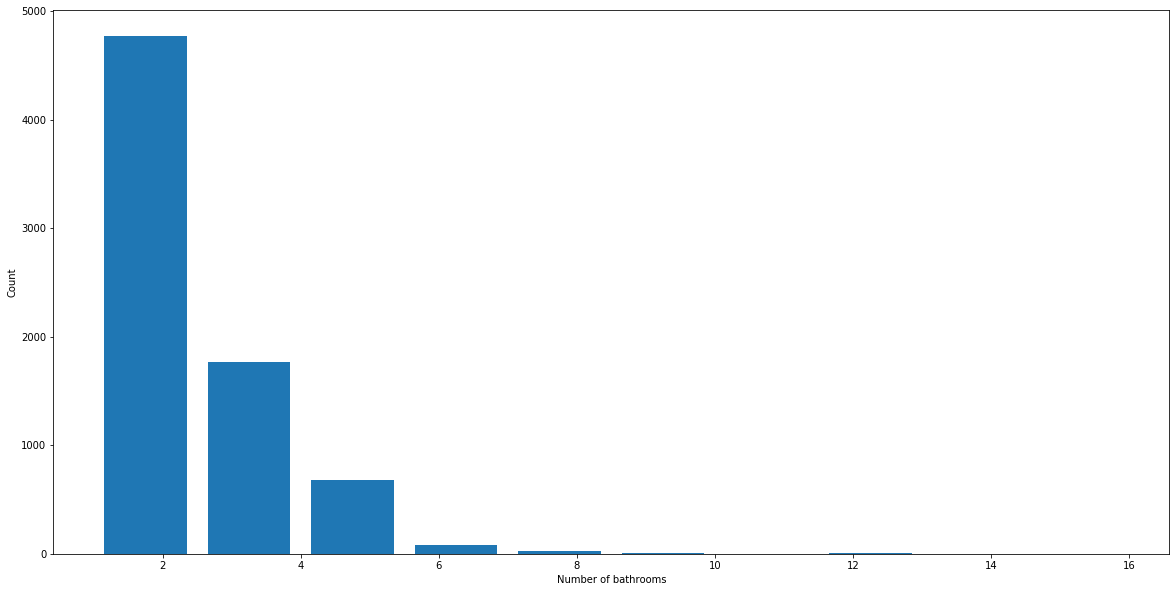

In [56]:

plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [57]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,new_size,price_per_sq
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8478,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8567,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9307,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [58]:
df8[df8.bath>df8.new_size+2]

,location,size,total_sqft,bath,price,new_size,price_per_sq
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8402,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [59]:
df9=df8[df8.bath<df8.new_size+2]
df9

,location,size,total_sqft,bath,price,new_size,price_per_sq
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...
10236,others,2 BHK,1200.0,2.0,70.0,2,5833.333333
10237,others,1 BHK,1800.0,1.0,200.0,1,11111.111111
10240,others,2 BHK,1353.0,2.0,110.0,2,8130.081301
10241,others,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [60]:
df10 = df9.drop(['size','price_per_sq'],axis='columns')
df10.head(3)


,location,total_sqft,bath,price,new_size
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


In [61]:
#now  we start model building and our algorithm does not understand categorical data so we use one hot encoding to convert  categorical features into quantative features
#for this we use pd.get_dummies

In [65]:
dummy=pd.get_dummies(df10.location)
dummy

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df11=pd.concat([df10,dummy.drop('others',axis='columns')],axis='columns')
#we can get rid of column to prevrnt code from dummy trap

In [69]:
df12=df11.drop('location',axis='columns')
df12

,total_sqft,bath,price,new_size,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:

X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,new_size,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y = df12.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [85]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.840149216405345

In [93]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77808661, 0.84607742, 0.82029593, 0.84377456, 0.77775387])

In [94]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.848456,{'normalize': False}
1,lasso,0.709011,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.754356,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [95]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [96]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


84.36211941796303

In [97]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


87.07226484436282

In [98]:
predict_price('Indira Nagar',1000, 2, 2)


173.75105826806663

In [99]:
predict_price('Indira Nagar',1000, 3, 3)


176.4612036944664